### Necessary imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### One Time pre-processing required to Convert the dataset from .arff format to .csv format and store it for future use.

In [2]:
# # Load Dataset
# path_to_dataset = './Training Dataset.arff'
# data = arff.loadarff(path_to_dataset)
# df = pd.DataFrame(data[0])

# # Convert the data from byte format to strings
# cols = list(df.columns)
# csv_dataset = []

# for i in range(len(df)):
#     row = list(df.iloc[i])
#     new_row = [val.decode('utf-8') for val in row]    
#     csv_dataset.append(new_row)

# # Convert the list of strings to np array
# csv_dataset = np.array(csv_dataset)

# # Convert the np array to pandas dataframe
# df_updated = pd.DataFrame(csv_dataset, columns = cols)

# # Save the data frame as CSV file
# df_updated.to_csv('dataset.csv')

### Import the dataset

In [3]:
path_to_dataset_csv = './dataset.csv'
data = pd.read_csv(path_to_dataset_csv,index_col=0)
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
data.shape

(11055, 31)

In [5]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Drop any null/nan values

In [6]:
data = data.dropna()
data.shape

(11055, 31)

### Drop duplicates

In [7]:
# data = data.drop_duplicates()
# data.shape

### Check for counts of different values

In [8]:
counts_data_frame = pd.DataFrame()
counts_data_frame['count_of'] = [-1,0,1]
cols = list(data.columns)
for col in cols:
    cnt = data[col].value_counts()
    l = np.zeros(3)
    for val in cnt.index.values:
        l[val+1] = cnt[val]
    counts_data_frame[col] = l

counts_data_frame.set_index('count_of', inplace=True)
counts_data_frame

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count_of,,,,,,,,,,,,,,,,,,,,,
-1,3793.0,8960.0,1444.0,1655.0,1429.0,9590.0,3363.0,3557.0,7389.0,2053.0,...,2137.0,1012.0,5189.0,3443.0,2655.0,8201.0,1539.0,548.0,1550.0,4898.0
0,0.0,135.0,0.0,0.0,0.0,0.0,3622.0,1167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2569.0,0.0,0.0,6156.0,0.0,0.0
1,7262.0,1960.0,9611.0,9400.0,9626.0,1465.0,4070.0,6331.0,3666.0,9002.0,...,8918.0,10043.0,5866.0,7612.0,5831.0,2854.0,9516.0,4351.0,9505.0,6157.0


### Draw pairplots

In [9]:
# Pairplot will take a lot of time as 31*30 = 900 plots with 11000 samples.
# Will load it from filesystem after generating it once
# sns.pairplot(data, hue="Result")

### Check for co-relation between different features

<AxesSubplot: >

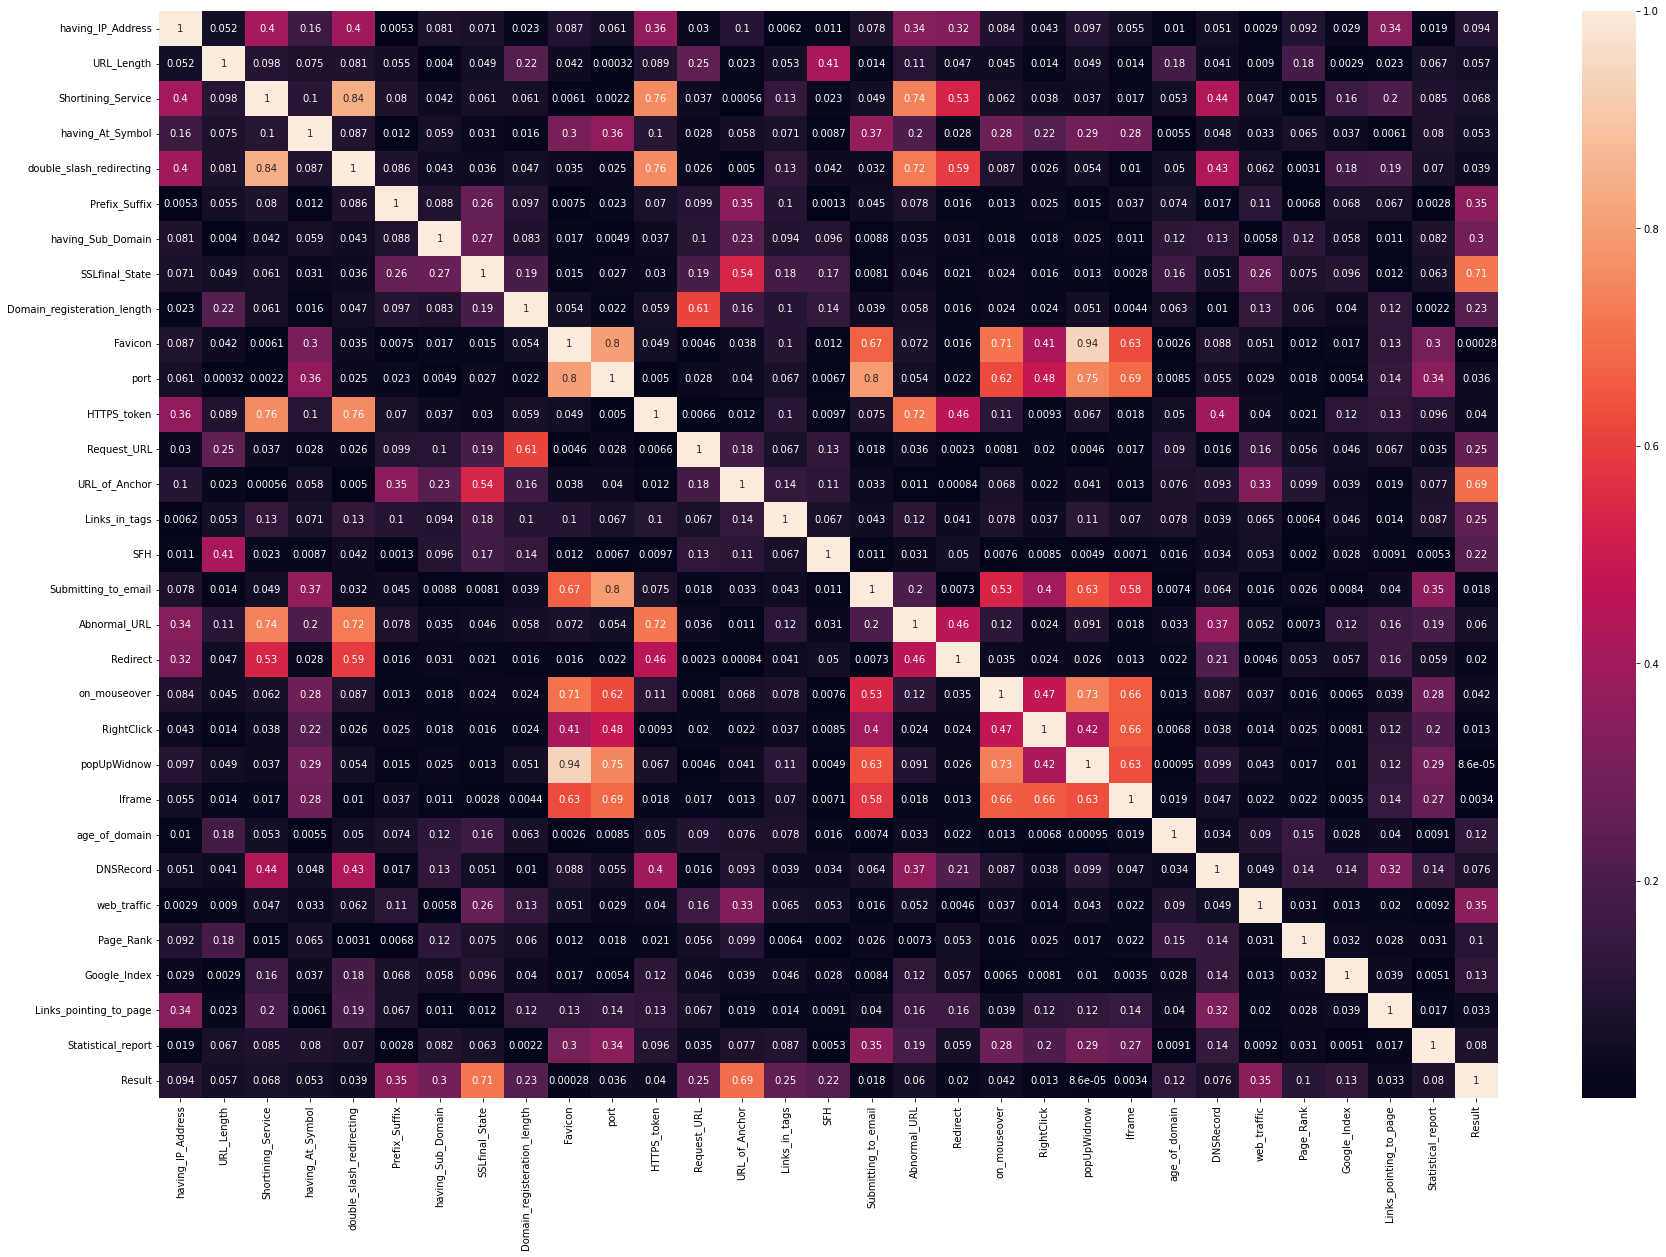

In [10]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr().abs(),  annot=True)

### Using co-relation we can check which features affect the result more than others.

In [11]:
# mean_of_corr_for_result = sum(data.corr().abs()['Result'][:-1])/len(data.corr().abs()['Result'][:-1])
# cols_with_corr_greater_than_mean = {}

# for col in data.corr().abs()['Result'][:-1].index:
#     if data.corr().abs()['Result'][:-1][col] > mean_of_corr_for_result:
#         cols_with_corr_greater_than_mean[col] = data.corr().abs()['Result'][:-1][col]
# print (cols_with_corr_greater_than_mean)

### Set data in X and Y

In [12]:
X = np.array(data.drop(columns=['Result']))
Y = np.array(data['Result'])
print (X.shape)
print (Y.shape)

print (np.unique(Y, return_counts=True))
Y[Y == -1] = 0
print(np.unique(Y, return_counts=True))

(11055, 30)
(11055,)
(array([-1,  1], dtype=int64), array([4898, 6157], dtype=int64))
(array([0, 1], dtype=int64), array([4898, 6157], dtype=int64))


### T-SNE for data

In [13]:
# We want to get TSNE embedding with 2 dimensions only
tsne = TSNE(2, learning_rate='auto', n_iter=300,init='pca',random_state=15)
tsne_result = tsne.fit_transform(X)
print ('Reduced to ', tsne_result.shape,' in ',tsne.n_iter_ , ' iterations')

C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Reduced to  (11055, 2)  in  299  iterations


In [14]:
tsne_result

array([[ 5.233927  ,  4.6154637 ],
       [-8.989216  ,  0.42735493],
       [-9.9599085 , -0.70245534],
       ...,
       [-4.9311314 ,  3.0296245 ],
       [ 5.5032177 , -9.925207  ],
       [ 3.6815255 , -8.981323  ]], dtype=float32)

### Change label from -1 to 0 in Y

In [15]:
phishing_result = tsne_result[Y == 1]
benign_result = tsne_result[Y == 0]

print(phishing_result.shape)
print(benign_result.shape)

(6157, 2)
(4898, 2)


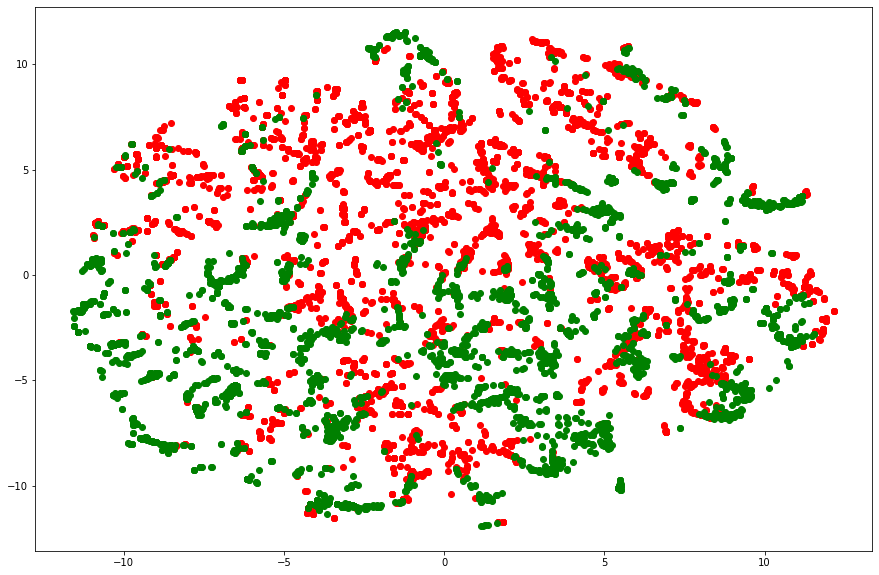

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(phishing_result[:,0], phishing_result[:,1], color='red')
plt.scatter(benign_result[:,0], benign_result[:,1], color='green')
plt.show()

### Split data in test and train to check

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(tsne_result, Y, test_size=0.3, random_state=20)

print (train_data.shape, train_labels.shape)
print (test_data.shape, test_labels.shape)

(7738, 2) (7738,)
(3317, 2) (3317,)


### Create a Perceptron Class

In [18]:
class Perceptron1:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

### Train perceptron multiple times to average out the accuracy for TSNE embeddings

In [19]:
test_loss = []
test_loss1 = []
train_loss = []
train_loss1 = []

for epoch in range(5):
    
    print('epoch ->', epoch)

    p = Perceptron()
    p1 = Perceptron1(learning_rate = 0.01, n_iters= 1000)
    
    train_data, test_data, train_labels, test_labels = train_test_split(tsne_result, Y, test_size=0.3)

    p.fit(train_data, train_labels)
    p1.fit(train_data, train_labels)

    predictions_train = p.predict(train_data)
    predictions_train1 = p1.predict(train_data)
    
    predictions_test = p.predict(test_data)
    predictions_test1 = p1.predict(test_data)
    
    train_score = accuracy_score(predictions_train, train_labels)
    train_score1 = accuracy_score(predictions_train1, train_labels)
    
    test_score = accuracy_score(predictions_test, test_labels)
    test_score1 = accuracy_score(predictions_test1, test_labels)

    print ('train accuracy = ', train_score)
    print ('train accuracy1 = ', train_score1)
    
    print ('test accuracy = ', test_score)
    print ('test accuracy1 = ', test_score1)
    
    print ('iterations used for inbuilt = ', p.n_iter_)
    print ('iterations used for custom = ', p1.n_iters)
    
    test_loss.append(test_score)    
    test_loss1.append(test_score1)    
    
    train_loss.append(train_score)
    train_loss1.append(train_score1)
    
    print ()

epoch -> 0
train accuracy =  0.5522098733522874
train accuracy1 =  0.6592142672525201
test accuracy =  0.5679831172746458
test accuracy1 =  0.656315948145915
iterations used for inbuilt =  9
iterations used for custom =  1000

epoch -> 1
train accuracy =  0.6218661152752649
train accuracy1 =  0.4131558542258982
test accuracy =  0.6315948145914984
test accuracy1 =  0.3952366596321978
iterations used for inbuilt =  7
iterations used for custom =  1000

epoch -> 2
train accuracy =  0.6891961747221504
train accuracy1 =  0.6496510726285862
test accuracy =  0.6704853783539343
test accuracy1 =  0.6385287910762737
iterations used for inbuilt =  8
iterations used for custom =  1000

epoch -> 3
train accuracy =  0.5706901008012406
train accuracy1 =  0.6391832514861722
test accuracy =  0.5803436840518541
test accuracy1 =  0.6472716309918601
iterations used for inbuilt =  14
iterations used for custom =  1000

epoch -> 4
train accuracy =  0.6670974411992763
train accuracy1 =  0.6583096407340399
te

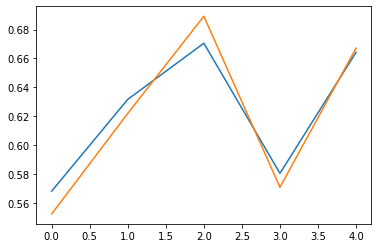

In [20]:
plt.plot(test_loss)
plt.plot(train_loss)

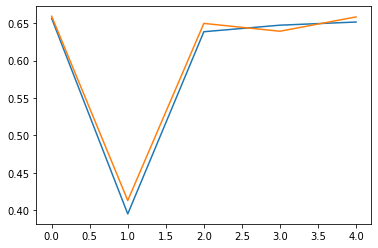

In [21]:
plt.plot(test_loss1)
plt.plot(train_loss1)

### Plot a decision boundry for TSNE embeddings

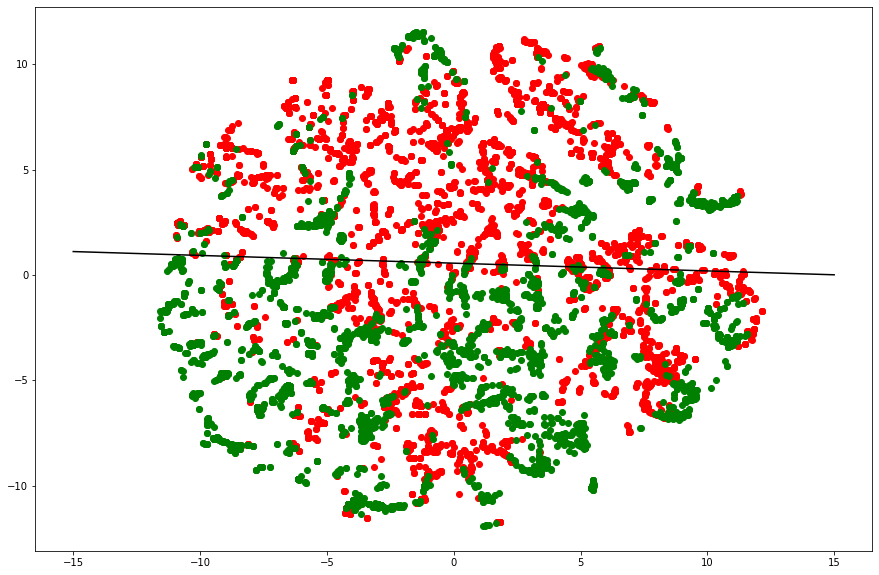

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(phishing_result[:,0], phishing_result[:,1], color='red')
plt.scatter(benign_result[:,0], benign_result[:,1], color='green')

x1 = np.linspace(-15,15,100)
x2 = [(p.coef_[0][0]/p.coef_[0][1])*x_+ (p.intercept_/p.coef_[0][1]) for x_ in x1]
plt.plot(x1,x2,color='black')
plt.show()

### Train perceptron multiple times to average out the accuracy for Entire Dataset

In [23]:
test_loss = []
test_loss1 = []
train_loss = []
train_loss1 = []

for epoch in range(5):
    
    print('epoch ->', epoch)

    p = Perceptron()
    p1 = Perceptron1(learning_rate = 0.01, n_iters= 1000)
    
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)

    p.fit(train_data, train_labels)
    p1.fit(train_data, train_labels)

    predictions_train = p.predict(train_data)
    predictions_train1 = p1.predict(train_data)
    
    predictions_test = p.predict(test_data)
    predictions_test1 = p1.predict(test_data)
    
    train_score = accuracy_score(predictions_train, train_labels)
    train_score1 = accuracy_score(predictions_train1, train_labels)
    
    test_score = accuracy_score(predictions_test, test_labels)
    test_score1 = accuracy_score(predictions_test1, test_labels)

    print ('train accuracy = ', train_score)
    print ('train accuracy1 = ', train_score1)
    
    print ('test accuracy = ', test_score)
    print ('test accuracy1 = ', test_score1)
    
    print ('iterations used for inbuilt = ', p.n_iter_)
    print ('iterations used for custom = ', p1.n_iters)
    
    test_loss.append(test_score)    
    test_loss1.append(test_score1)    
    
    train_loss.append(train_score)
    train_loss1.append(train_score1)
    
    print ()

epoch -> 0
train accuracy =  0.8614629103127424
train accuracy1 =  0.9105712070302404
test accuracy =  0.8664455833584565
test accuracy1 =  0.9161893277057582
iterations used for inbuilt =  6
iterations used for custom =  1000

epoch -> 1
train accuracy =  0.9095373481519773
train accuracy1 =  0.799819074696304
test accuracy =  0.9062405788362978
test accuracy1 =  0.8061501356647574
iterations used for inbuilt =  9
iterations used for custom =  1000

epoch -> 2
train accuracy =  0.8198500904626519
train accuracy1 =  0.9069527009563194
test accuracy =  0.8203195658727767
test accuracy1 =  0.9110642146517938
iterations used for inbuilt =  7
iterations used for custom =  1000

epoch -> 3
train accuracy =  0.8883432411475833
train accuracy1 =  0.9157405014215559
test accuracy =  0.8836297859511607
test accuracy1 =  0.9198070545673802
iterations used for inbuilt =  9
iterations used for custom =  1000

epoch -> 4
train accuracy =  0.8882140087878004
train accuracy1 =  0.8662445076247093
tes

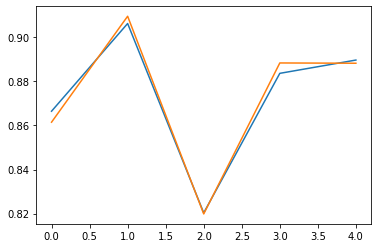

In [24]:
plt.plot(test_loss)
plt.plot(train_loss)

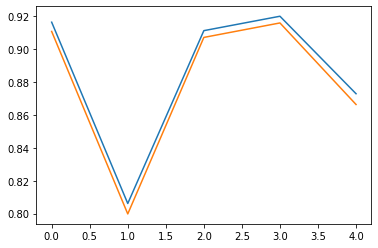

In [25]:
plt.plot(test_loss1)
plt.plot(train_loss1)

In [28]:
X.shape

(11055, 30)

In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)
train_data_del = train_data
test_data_del = test_data

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

0.9219173952366596

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(train_data_del, train_labels)
neigh.score(test_data_del, test_labels)

0.9457340970756708

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

0.9439252336448598

In [47]:
acc = []

for i in range(3000):
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)
    train_data_del = train_data
    test_data_del = test_data
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(train_data_del, train_labels)
    acc.append(gnb.score(test_data_del, test_labels))

In [49]:
sum(acc)/len(acc)

0.6044044819616138

In [56]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 4), random_state=2).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9487488694603557